In [8]:
cd ../src

/home/sankha/Documents/programs/ML/densityNN/src


# KL Divergence

This notebook is going to explore the KL divergence ...

For discrete distributions, the K-L divergence is defined by the following formula

\begin{align*}
D_{KL} = \sum_{x \in \chi} {P(x) \log {\frac {P(x)} {q(x)}}  }
\end{align*}

For continuous variables, this is represented by the integral.


In [9]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from lib.density.utils import divergences, OptimizeNormalKL
from scipy.stats import multivariate_normal

In [10]:
mu = np.array([1, 2])
cov = np.array([
    [1, 0.5],
    [0.5, 2]
])

normal1 = multivariate_normal(mean=mu, cov=cov)

In [11]:
data = np.linspace(-10, 10, 100).reshape((-1, 2))
print(data)
normal1.pdf(data)

[[-10.          -9.7979798 ]
 [ -9.5959596   -9.39393939]
 [ -9.19191919  -8.98989899]
 [ -8.78787879  -8.58585859]
 [ -8.38383838  -8.18181818]
 [ -7.97979798  -7.77777778]
 [ -7.57575758  -7.37373737]
 [ -7.17171717  -6.96969697]
 [ -6.76767677  -6.56565657]
 [ -6.36363636  -6.16161616]
 [ -5.95959596  -5.75757576]
 [ -5.55555556  -5.35353535]
 [ -5.15151515  -4.94949495]
 [ -4.74747475  -4.54545455]
 [ -4.34343434  -4.14141414]
 [ -3.93939394  -3.73737374]
 [ -3.53535354  -3.33333333]
 [ -3.13131313  -2.92929293]
 [ -2.72727273  -2.52525253]
 [ -2.32323232  -2.12121212]
 [ -1.91919192  -1.71717172]
 [ -1.51515152  -1.31313131]
 [ -1.11111111  -0.90909091]
 [ -0.70707071  -0.50505051]
 [ -0.3030303   -0.1010101 ]
 [  0.1010101    0.3030303 ]
 [  0.50505051   0.70707071]
 [  0.90909091   1.11111111]
 [  1.31313131   1.51515152]
 [  1.71717172   1.91919192]
 [  2.12121212   2.32323232]
 [  2.52525253   2.72727273]
 [  2.92929293   3.13131313]
 [  3.33333333   3.53535354]
 [  3.73737374

array([7.65144615e-33, 1.22794054e-30, 1.63525271e-28, 1.80703327e-26,
       1.65699480e-24, 1.26081067e-22, 7.96071967e-21, 4.17088789e-19,
       1.81333662e-17, 6.54187250e-16, 1.95839120e-14, 4.86486229e-13,
       1.00280244e-11, 1.71527573e-10, 2.43459223e-09, 2.86742621e-08,
       2.80241209e-07, 2.27271760e-06, 1.52944083e-05, 8.54070293e-05,
       3.95756704e-04, 1.52172674e-03, 4.85533048e-03, 1.28550760e-02,
       2.82425709e-02, 5.14881795e-02, 7.78905150e-02, 9.77766927e-02,
       1.01849720e-01, 8.80355467e-02, 6.31436991e-02, 3.75816380e-02,
       1.85607328e-02, 7.60655938e-03, 2.58675401e-03, 7.29954402e-04,
       1.70926760e-04, 3.32122363e-05, 5.35500533e-06, 7.16465733e-07,
       7.95434951e-08, 7.32803685e-09, 5.60201605e-10, 3.55365107e-11,
       1.87059145e-12, 8.17065429e-14, 2.96147763e-15, 8.90704826e-17,
       2.22296633e-18, 4.60368597e-20])

In [12]:
def normal(theta, mu, sigma):
    '''
    theta (nd-array) (N, d): N values of d-dimensional space of thetas
    mu (nd array) (1, d): d dimensional values for the d dimensions
    sigma (nd array) (1, d): the diagonal of the covariance matrix (just for simplifying the diagonal)
    '''
    
    d = len(mu.flatten())
    theta_1 = (theta - mu) **2 /(2 * sigma )
    theta_1 = -1 * theta_1.sum(axis=1)
    
    det = sigma.prod()
    
    prob =  np.exp( theta_1 ) / np.sqrt( (2 * np.pi)**d * det )
    
    return prob


## Examples of getting distributions over here ...

First, a 1D case ...

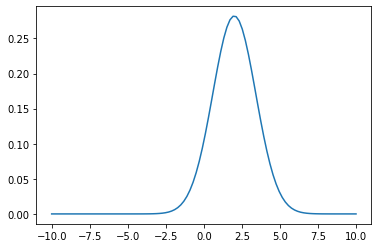

0.9899999951196327


In [13]:
theta = np.linspace(-10, 10, 100).reshape((-1, 1))
mu    = np.array([2]).reshape((1,-1))
sigma = np.array([2]).reshape((1,-1))

prob = normal( theta, mu, sigma )
plt.plot( theta.flatten(), prob )
plt.show()
plt.close('all')
print(prob.sum() * 20/100)

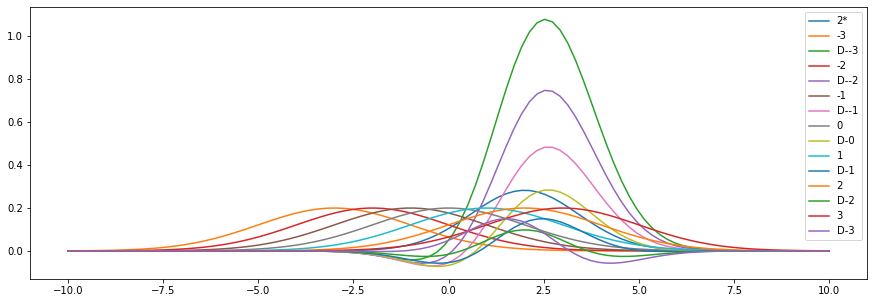

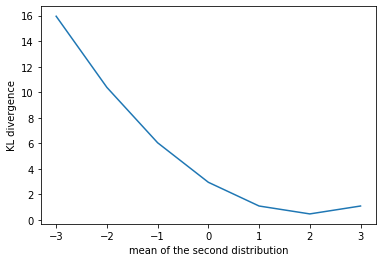

In [14]:
theta = np.linspace(-10, 10, 100).reshape((-1, 1))
mu_1  = np.array([2]).reshape((1,-1))
sigma_1 = np.array([2]).reshape((1,-1))
mu_2  = np.array([-3]).reshape((1,-1))
sigma_2 = np.array([4]).reshape((1,-1))

plt.figure(figsize=(15, 5))
prob_1 = normal(theta, mu_1, sigma_1)
plt.plot(theta.flatten(), prob_1, label='2*' )

divs = []
ms = [-3, -2, -1, 0, 1, 2, 3]
for m in ms:
    mu_2  = np.array([m]).reshape((1,-1))
    prob_2 = normal(theta, mu_2, sigma_2)

    div, div_all = divergences.D_KL(prob_1, prob_2, returnVals=True)
    divs.append( div )

    plt.plot(theta.flatten(), prob_2, label=f'{m}' )
    plt.plot(theta.flatten(), div_all, label=f'D-{m}' )
    
plt.legend()

plt.figure()
plt.plot(ms, divs)
plt.xlabel('mean of the second distribution')
plt.ylabel('KL divergence')

plt.show()
plt.close()

# Optimization

Now that we see how the KL divergence decreases with the convergence between the two probability functions, is it possible to create an optimizer that will provide a Gaussian function that minimized the distance between *any* given function and the returned Gaussian function? The answer is, of course. This will be explored in the next section ...

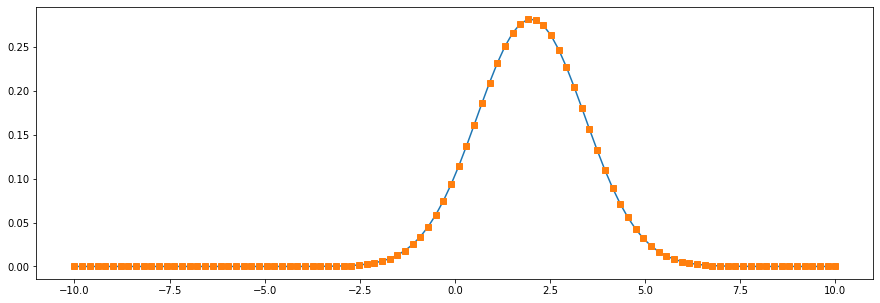

In [15]:
theta = np.linspace(-10, 10, 100).reshape((-1, 1))
mu_1  = np.array([2]).reshape((1,-1))
sigma_1 = np.array([2]).reshape((1,-1))

plt.figure(figsize=(15, 5))
prob_1 = normal(theta, mu_1, sigma_1)
plt.plot(theta.flatten(), prob_1, label='2*' )

mu0 = np.array([-1]).reshape((1, -1))

optKL = OptimizeNormalKL.OptimizeNormalKL(prob_1, theta)

# optKL = OptKL(prob_1, theta)
q_optimized = optKL.optimize(mu0)

plt.plot( theta.flatten(), q_optimized, 's') 


plt.show()
plt.close('all')

Now for the 2D case:

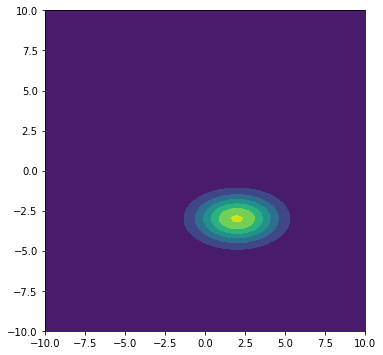

0.9800985925765558


In [16]:
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
theta = np.array(list(zip(X.flatten(), Y.flatten())))

mu    = np.array([2, -3])
sigma = np.array([
    [3, 0],
    [0, 1]
])

prob = multivariate_normal.pdf( theta, mu, sigma )
prob = prob.reshape(100, 100)

plt.figure(figsize=(5,5))
plt.axes([0.1, 0.1, 0.89, 0.89])
plt.contourf(X, Y, prob)
plt.show()
plt.close('all')

print( prob.sum() * (20/100)**2 )